In [ ]:
#The PSD of each channel has peaks at various frequency. For each channel, we calculated the mean frequency value of these peaks and 
#compared the results between the epileptic and non-epileptic groups using a histogram and 
#the normalized Mann-Whitney statistic.

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

Per 'J1.csv' il numero di picchi è 7 e la media dei valori dei picchi è 11.9958227538542
Per 'J2.csv' il numero di picchi è 4 e la media dei valori dei picchi è 10.894490853625548
Per 'J3.csv' il numero di picchi è 7 e la media dei valori dei picchi è 12.359976119532707
Per 'J4.csv' il numero di picchi è 4 e la media dei valori dei picchi è 8.84703215271054
Per 'J5.csv' il numero di picchi è 3 e la media dei valori dei picchi è 7.36686468619919
Per 'L1.csv' il numero di picchi è 3 e la media dei valori dei picchi è 10.129275275013207
Per 'L10.csv' il numero di picchi è 3 e la media dei valori dei picchi è 7.680830662990442
Per 'L11.csv' il numero di picchi è 2 e la media dei valori dei picchi è 6.458400648206094
Per 'L12.csv' il numero di picchi è 2 e la media dei valori dei picchi è 6.338179957652643
Per 'L13.csv' il numero di picchi è 2 e la media dei valori dei picchi è 6.295900528112712
Per 'L14.csv' il numero di picchi è 2 e la media dei valori dei picchi è 6.316528632837036
Per '

Per 'R12.csv' il numero di picchi è 12 e la media dei valori dei picchi è 19.1958401787422
Per 'R13.csv' il numero di picchi è 12 e la media dei valori dei picchi è 20.482250567506963
Per 'R14.csv' il numero di picchi è 10 e la media dei valori dei picchi è 18.684064298900697
Per 'R15.csv' il numero di picchi è 6 e la media dei valori dei picchi è 16.463479980299795
Per 'R16.csv' il numero di picchi è 2 e la media dei valori dei picchi è 11.25363013430543
Per 'R7.csv' il numero di picchi è 6 e la media dei valori dei picchi è 11.004963880190685
Per 'R8.csv' il numero di picchi è 11 e la media dei valori dei picchi è 46.80385436996969
Per 'R9.csv' il numero di picchi è 14 e la media dei valori dei picchi è 70.73163495475362
Per 'T1.csv' il numero di picchi è 8 e la media dei valori dei picchi è 12.62843952919584
Per 'T2.csv' il numero di picchi è 8 e la media dei valori dei picchi è 12.200806171012923
Per 'T3.csv' il numero di picchi è 7 e la media dei valori dei picchi è 12.12592303336

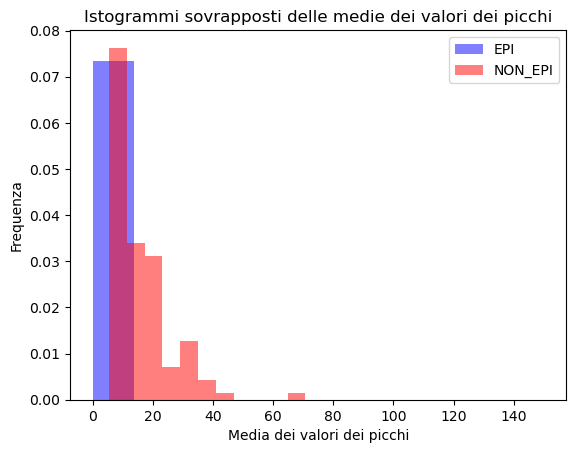

In [14]:
def calcola_media_picchi(folder_path, files, threshold=150):
    medie_picchi = []
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            data = pd.read_csv(file_path)
            
            # Supponiamo che i picchi siano nella prima colonna
            picchi = data.iloc[:, 0]
            
            # Filtra i picchi con valori inferiori a threshold
            picchi_filtrati = picchi[picchi < threshold]
            #print (f'per {file} i picchi sono {picchi_filtrati}')
            
            if len(picchi_filtrati) > 0:
                # Calcola la media dei valori dei picchi filtrati
                media_valori_picchi = picchi_filtrati.mean()
                medie_picchi.append(media_valori_picchi)
                
                
                print(f"Per '{file}' il numero di picchi è {len(picchi_filtrati)} e la media dei valori dei picchi è {media_valori_picchi}")
    
    return medie_picchi

# Esempio di utilizzo della funzione per due cartelle
folder_path = 'peaks_EPI'  # sostituisci con il percorso della tua cartella
files = os.listdir(folder_path)
folder_path_N = 'peaks_NON_EPI'  # sostituisci con il percorso della tua cartella
files_n = os.listdir(folder_path_N)

medie_picchi_EPI = calcola_media_picchi(folder_path, files)
medie_picchi_NON_EPI = calcola_media_picchi(folder_path_N, files_n)

u_statistic, p_value = mannwhitneyu(medie_picchi_EPI, medie_picchi_NON_EPI)
u_statistic_normalized = u_statistic / (len(medie_picchi_EPI) * len(medie_picchi_NON_EPI))

print(f"Statistica U normalizzata: {u_statistic_normalized}")
print(len(medie_picchi_NON_EPI))
# Crea due istogrammi sovrapposti
plt.hist(medie_picchi_EPI, bins=11, range=(0,150), density=True, alpha=0.5, label='EPI', color='blue')
plt.hist(medie_picchi_NON_EPI, bins=11, alpha=0.5, density=True, label='NON_EPI', color='red')

# Aggiungi etichette e titolo
plt.xlabel('Media dei valori dei picchi')
plt.ylabel('Frequenza')
plt.title('Istogrammi sovrapposti delle medie dei valori dei picchi')
plt.legend(loc='upper right')

# Mostra il grafico
plt.show()
